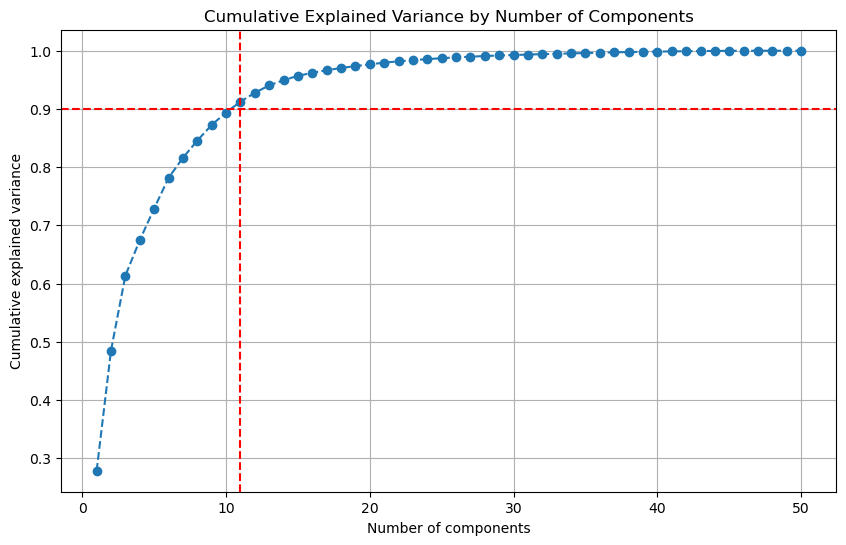

Optimal number of components for 90% explained variance: 11


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(40)

prep_data = pd.read_csv('../data/our_data_preprocessed_MinMaxScaler.csv')
data = pd.read_csv('../data/our_data.csv')

svd = TruncatedSVD(n_components=prep_data.shape[1])
svd.fit(prep_data)

explained_variance = svd.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--') 
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.9) + 1, color='r', linestyle='--')
plt.show()

optimal_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Optimal number of components for 90% explained variance: {optimal_components}")



In [33]:
df_svd = pd.DataFrame(svd.transform(prep_data)[:, :optimal_components], columns=[f'SVD_{i}' for i in range(1, optimal_components + 1)])
df_svd

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,SVD_11
0,3.927719,1.146033,-0.111926,0.183252,-0.005546,0.070698,0.354404,-0.451407,-0.570398,0.563027,-0.026781
1,4.854977,0.941671,-0.018974,0.100301,0.082800,-0.738261,-0.382811,-0.074879,-0.140424,-0.179439,0.110591
2,4.664587,-0.288425,1.380846,-0.025127,0.095583,-0.008512,0.715886,-0.515496,0.478409,-0.311459,-0.277422
3,5.985740,-0.708132,-0.841928,-0.262076,0.016192,-0.073292,0.243586,-0.465815,1.457865,0.644161,-0.002315
4,5.714281,-0.766803,-0.825459,0.002471,-0.121913,-0.043143,0.243777,-0.533604,-0.529072,0.599887,0.016247
...,...,...,...,...,...,...,...,...,...,...,...
787,4.673887,-0.293829,1.379997,0.124616,0.074609,0.059816,0.600170,-0.433457,-0.554341,0.567752,0.049282
788,4.643348,-1.099642,0.322528,0.259294,-0.748296,0.465039,-0.409823,-0.104414,-0.018248,-0.016049,-0.185576
789,4.784146,0.928638,-0.103531,-0.271330,0.009632,-0.118121,0.484691,-0.496873,0.301836,-0.451201,-0.335674
790,4.754290,0.907777,-0.004859,-0.301784,-0.779764,0.314020,-0.211888,0.073160,-0.312051,-0.353659,0.041603


<h1> Number of Clusters</h1>

In [34]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

def count_silhouette_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

def count_calinski_harabasz_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Calinski-Harabasz score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = calinski_harabasz_score(X, labels)
        scores.append(score)
    return scores

def count_davies_bouldin_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Davies-Bouldin score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = davies_bouldin_score(X, labels)
        scores.append(score)
    return scores

def show_scores(data, cluster_col):
    print(cluster_col)
    print("Silhouette Score: ", silhouette_score(data.drop(cluster_col, axis=1), data[cluster_col]))
    print("Calinski-Harabasz Score: ", calinski_harabasz_score(data.drop(cluster_col, axis=1), data[cluster_col]))
    print("Davies-Bouldin Score: ", davies_bouldin_score(data.drop(cluster_col, axis=1), data[cluster_col]))

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

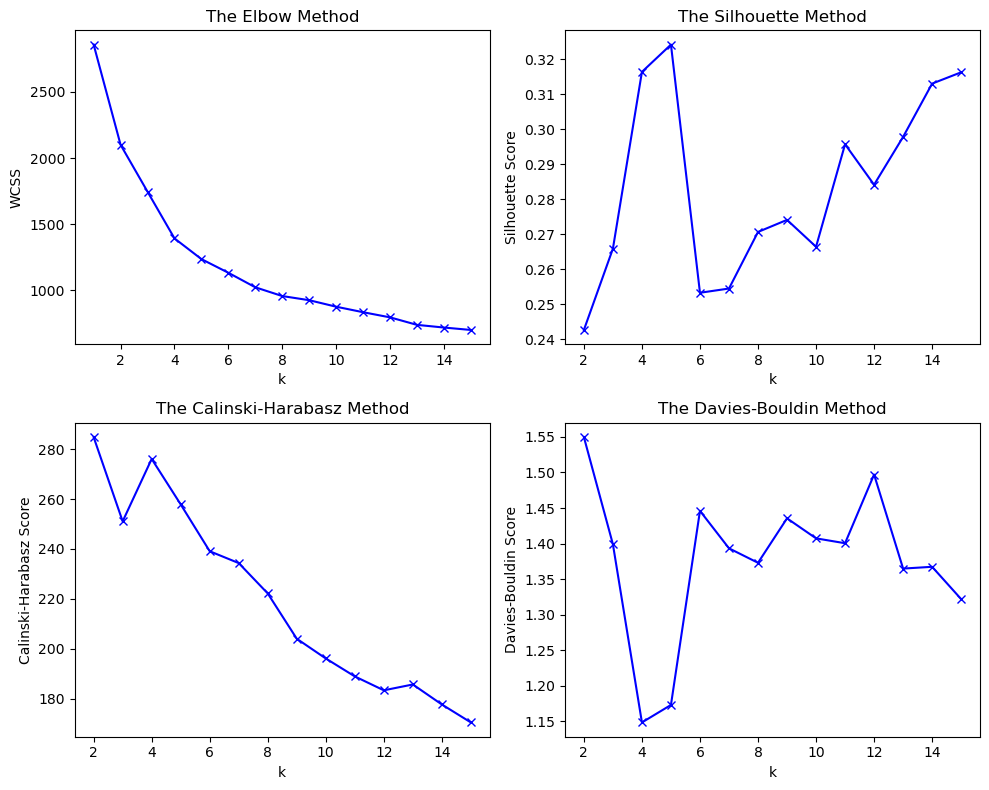

In [35]:
k_max = 15
wcss_vec = count_wcss_scores(df_svd, k_max)
silhouette_vec = count_silhouette_scores(df_svd, k_max)
calinski_harabasz_vec = count_calinski_harabasz_scores(df_svd, k_max)
davies_bouldin_vec = count_davies_bouldin_scores(df_svd, k_max)

x_ticks_wcss = list(range(1, len(wcss_vec) + 1))
x_ticks_silhouette = list(range(2, len(silhouette_vec) + 2))
x_ticks_calinski_harabasz = list(range(2, len(calinski_harabasz_vec) + 2))
x_ticks_davies_bouldin = list(range(2, len(davies_bouldin_vec) + 2))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#wcss
axs[0, 0].plot(x_ticks_wcss, wcss_vec, 'bx-')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('The Elbow Method')

#silhouette
axs[0, 1].plot(x_ticks_silhouette, silhouette_vec, 'bx-')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('The Silhouette Method')

#Calinski-Harabasz
axs[1, 0].plot(x_ticks_calinski_harabasz, calinski_harabasz_vec, 'bx-')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Calinski-Harabasz Score')
axs[1, 0].set_title('The Calinski-Harabasz Method')

#Davies-Bouldin
axs[1, 1].plot(x_ticks_davies_bouldin, davies_bouldin_vec, 'bx-')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('Davies-Bouldin Score')
axs[1, 1].set_title('The Davies-Bouldin Method')

plt.tight_layout()
plt.show()

The best number of clusters is 4 or 5. 4 clusters lead to the same problem as always - division by gpu_brand. So we will try 5

<h1> KMeans (5)</h1>

In [36]:
from sklearn.cluster import KMeans

if 'cluster' in df_svd.columns:
    df_umap = df_svd.drop('cluster', axis=1)

kmeans  = KMeans(n_clusters=5, random_state=0)

df_svd['cluster'] = kmeans.fit_predict(df_svd)
data['cluster'] = df_svd['cluster']

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
show_scores(df_svd, 'cluster')

cluster
Silhouette Score:  0.3242104496864801
Calinski-Harabasz Score:  257.84248448945567
Davies-Bouldin Score:  1.1731547842773122


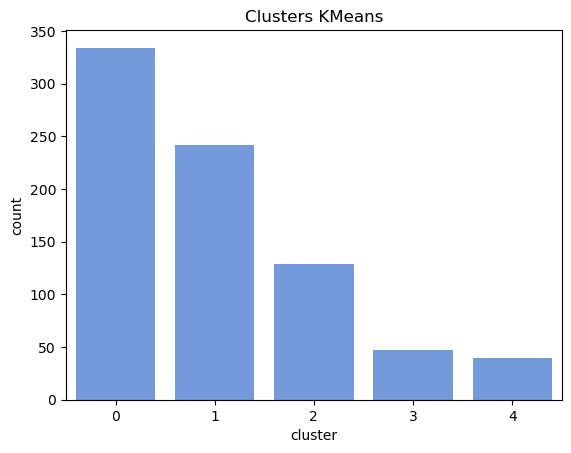

In [38]:
df_svd['cluster'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

#clusters barplot
sns.countplot(data=df_svd, x='cluster', color='cornflowerblue')
plt.title('Clusters KMeans')
plt.show()


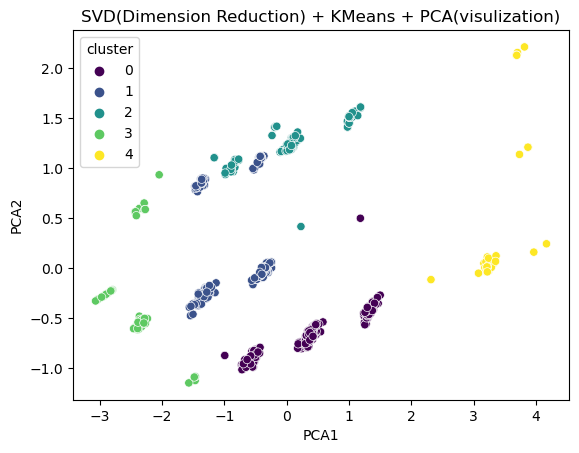

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_svd.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = df_svd['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('SVD(Dimension Reduction) + KMeans + PCA(visulization)')
plt.show()

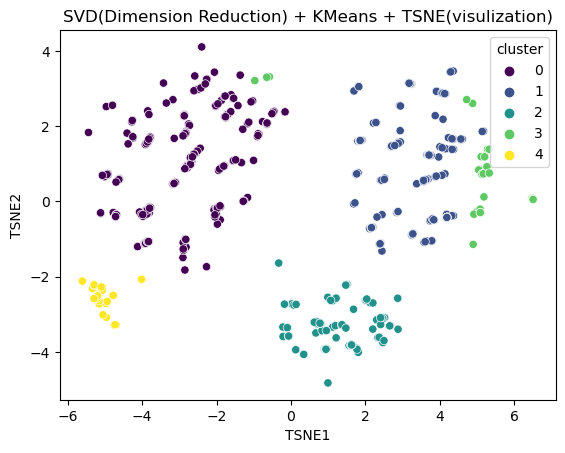

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=300, n_iter=300)
data_tsne = tsne.fit_transform(df_svd.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = df_svd['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('SVD(Dimension Reduction) + KMeans + TSNE(visulization)')
plt.show()

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


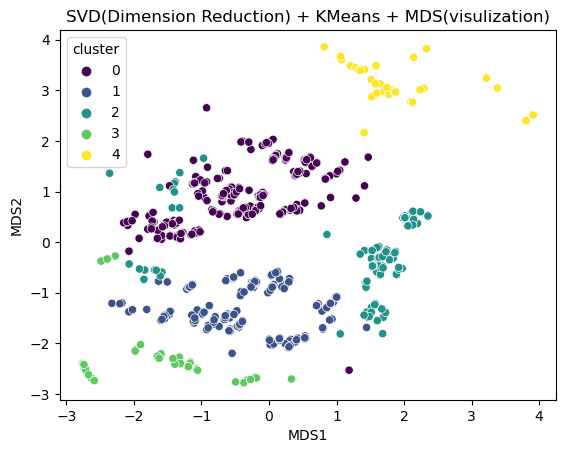

In [41]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(df_svd.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = df_svd['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('SVD(Dimension Reduction) + KMeans + MDS(visulization)')
plt.show()

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_76406/4001415352.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_76406/4001415352.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_76406/4001415352.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_76406/4001415352.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_76406/4001415352.py:10: UserWarning: FixedFor

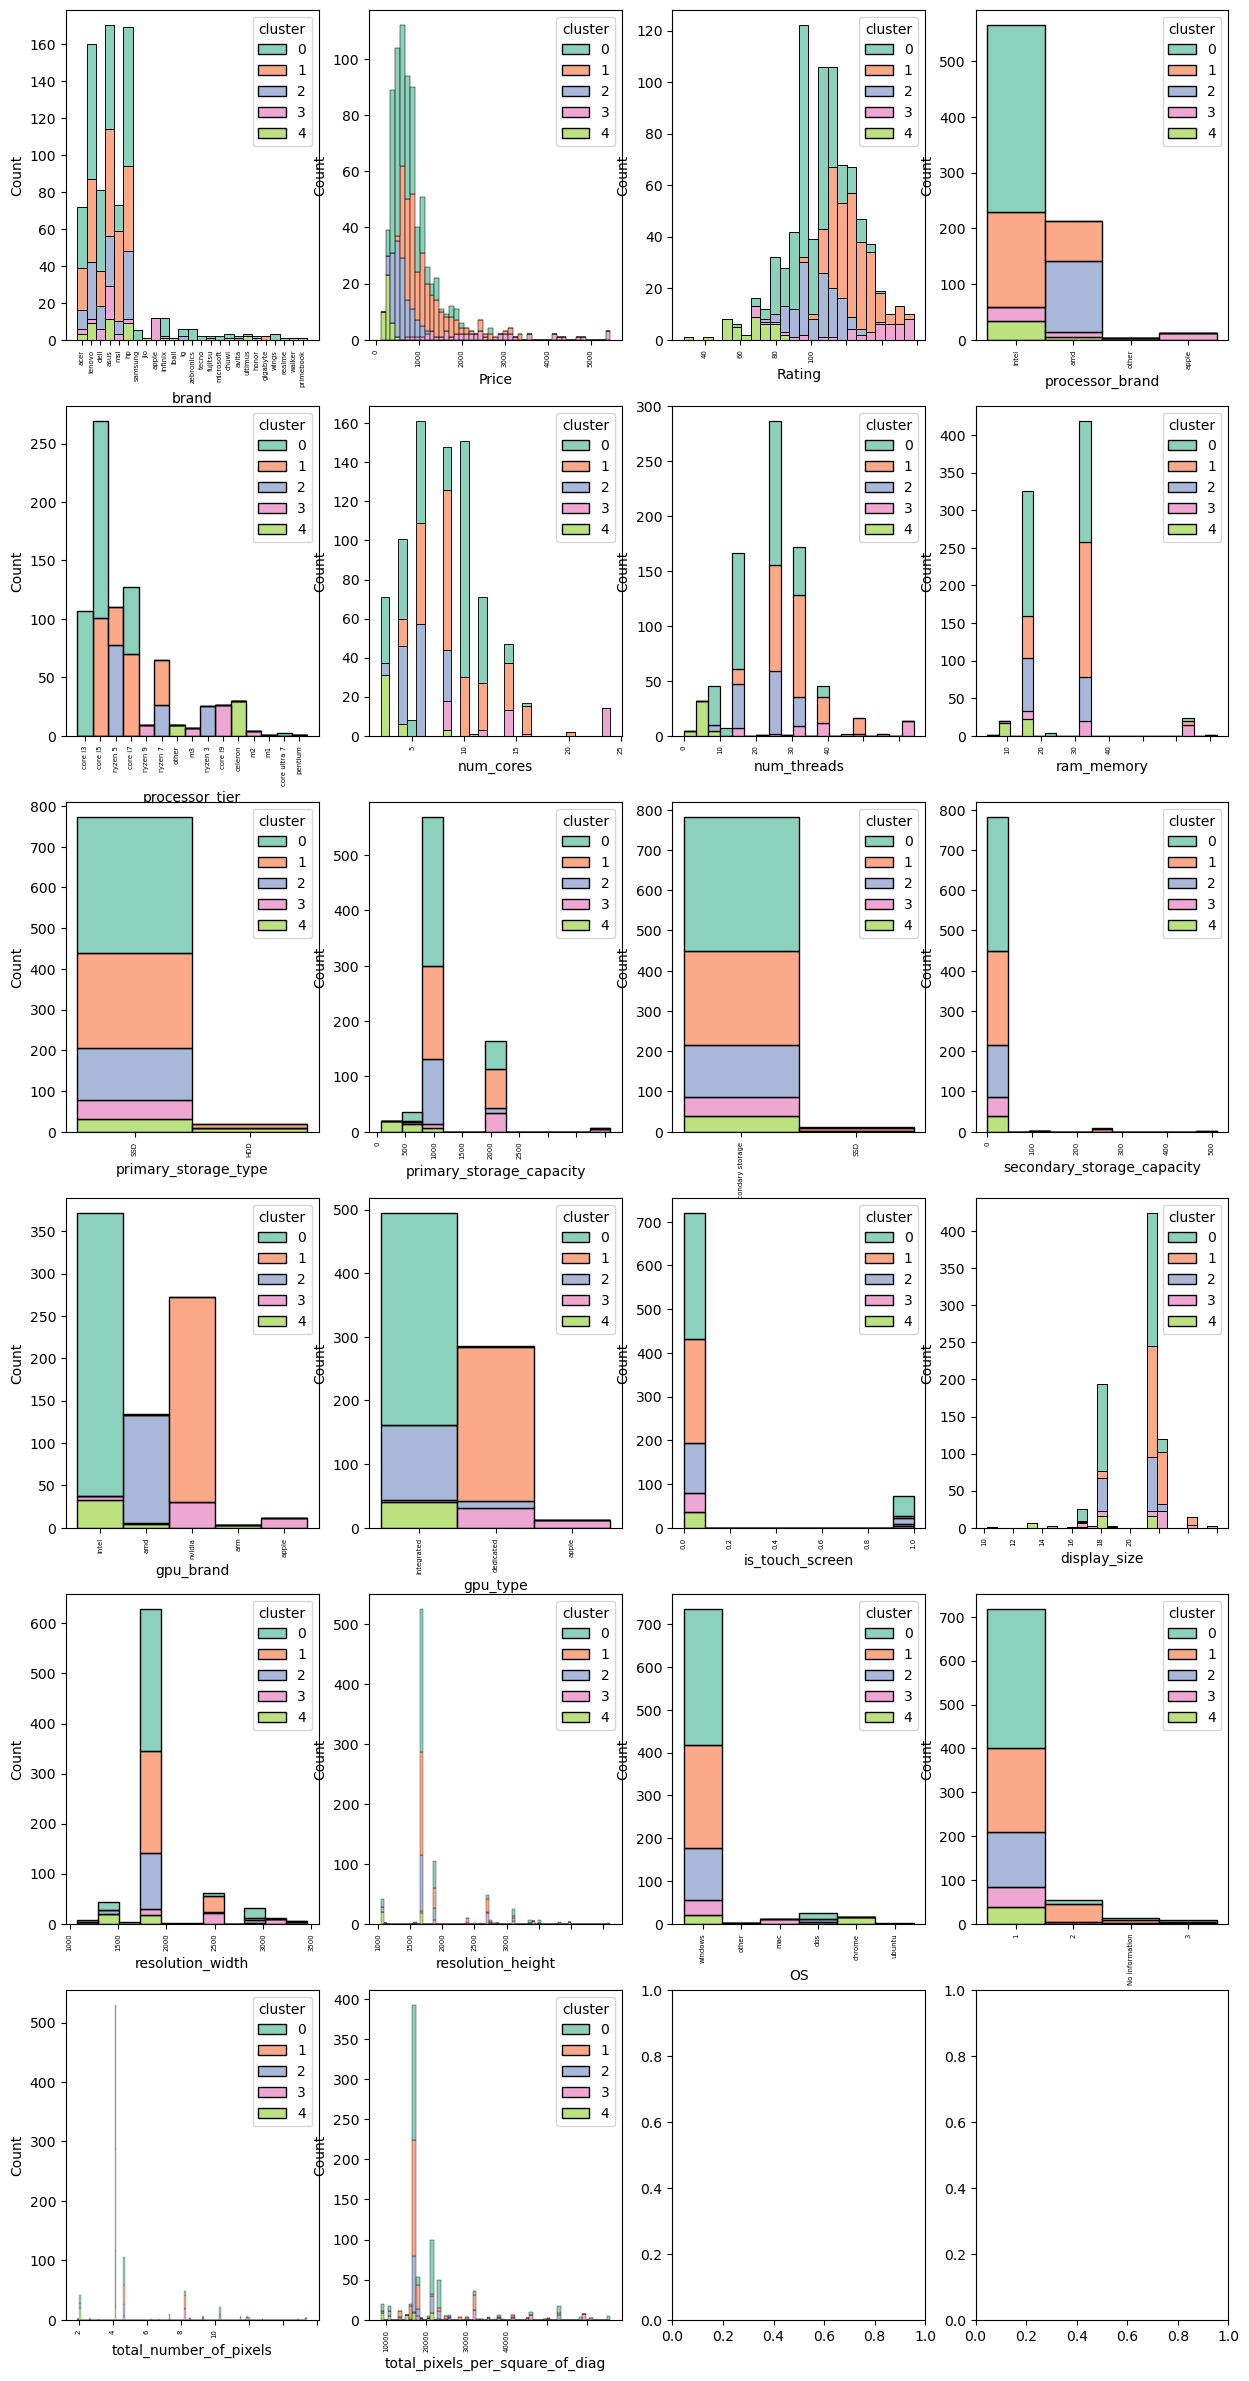

In [42]:
fig, axes = plt.subplots(6, 4, figsize=(15, 6 * 5))

axes = axes.flatten()

i=0
data = data.drop(['index', 'Model'], axis = 1)
for i, column in enumerate(data.columns):
    if column != 'cluster' :
        sns.histplot(data=data, x=column, hue="cluster", multiple="stack", ax=axes[i], palette='Set2')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].tick_params(axis='x', labelsize=5)
        axes[i].set_xlabel(column)
        i+=1

In [44]:
import plotly.express as px

fig = px.histogram(data, x='processor_tier', color='cluster')
fig.show()

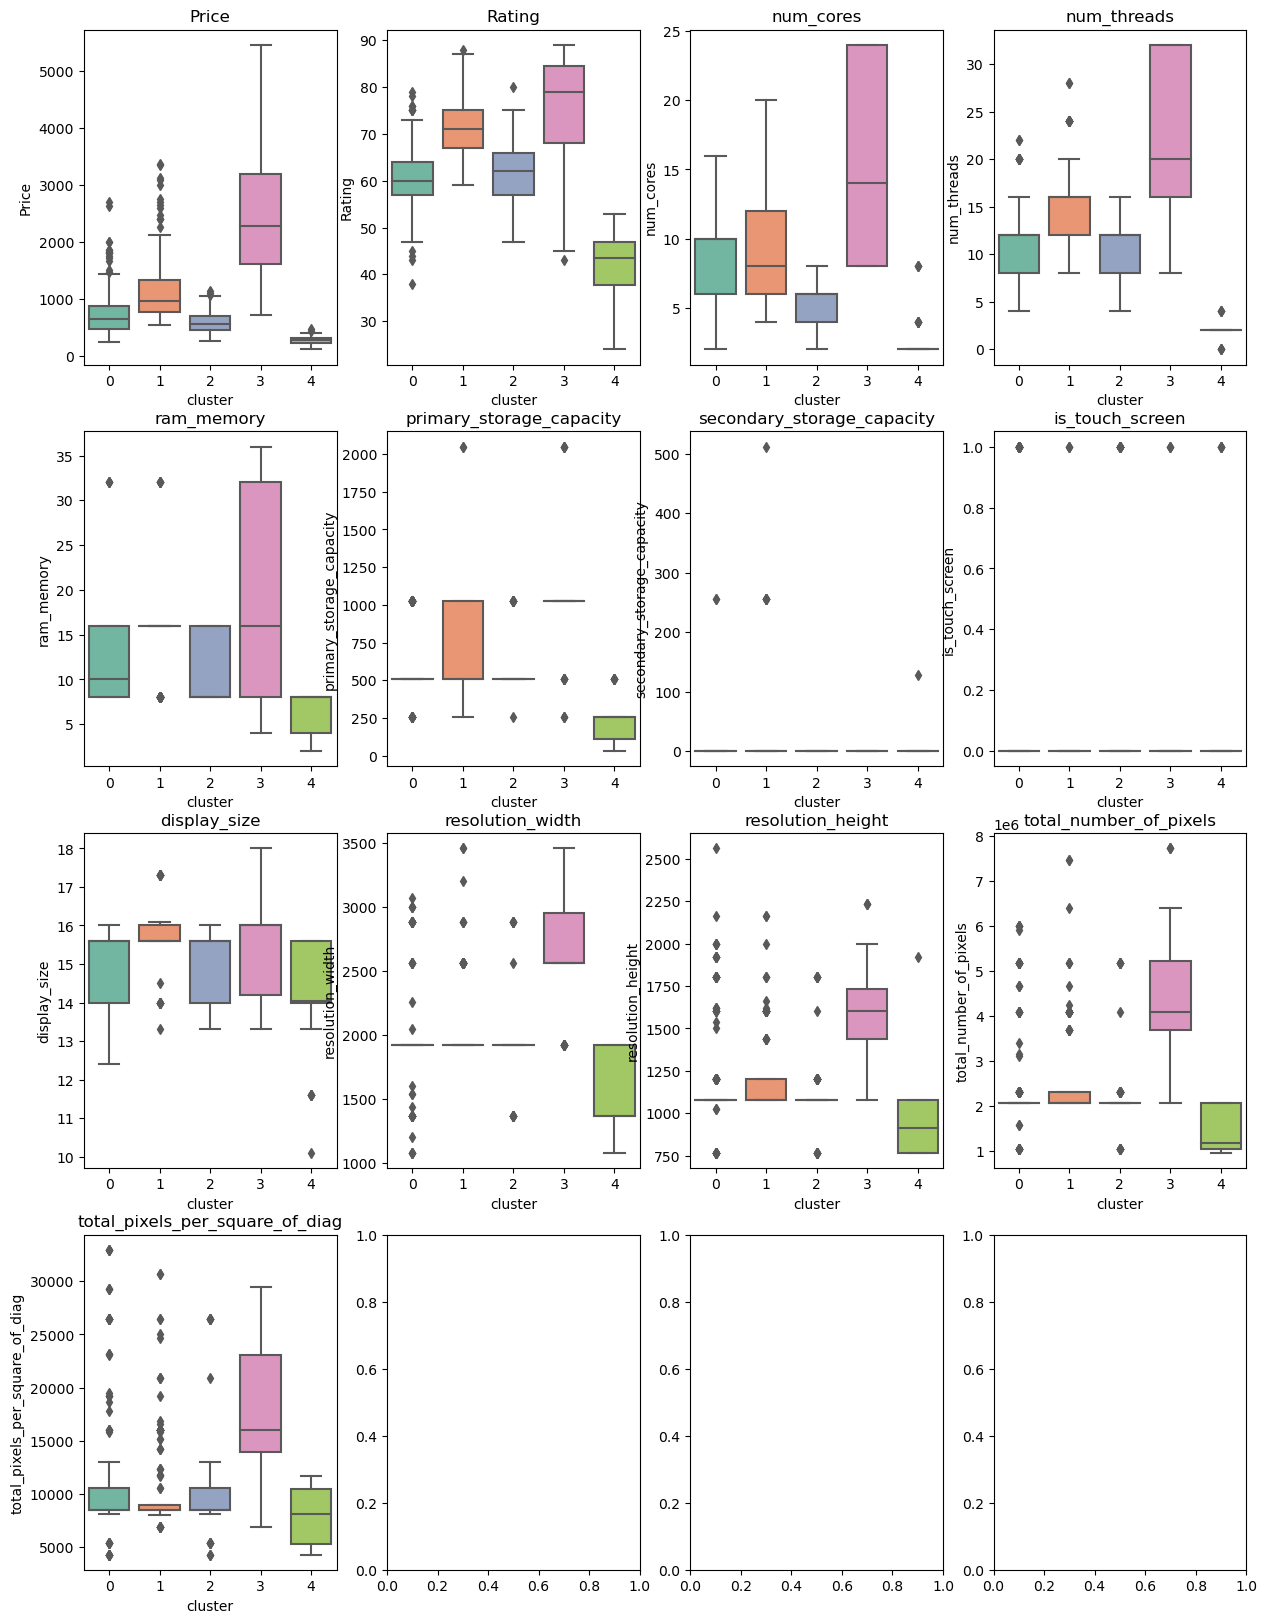

In [43]:
fig, axes = plt.subplots(4, 4, figsize=(15, 4 * 5))

axes = axes.flatten()

i=0
for column in data.columns:
    if column != 'cluster' and (type(data[column][0]) == np.float64 or type(data[column][0]) == np.int64):
        sns.boxplot(x='cluster', y=column, data=data, ax = axes[i], palette="Set2")
        axes[i].set_title(column)
        i+=1

- cluster 3 - laptops with the highest price and highest rating and great gpu (dedicated gpu or apple gpu), with great resolution - probably some kind of super premium laptops
- cluster 4 - the cheapest laptops with extremely low price and in general worst characteristics  - just the cheapest laptops, that are not good 
- cluster 1 - laptops with high diagonal (16 inches) with dedicated gpu with high rating - gaming laptops
- cluster 2 - some kind of trade-off between price and quality for people who want an AMD processor 
- cluster 0 -  some kind of trade-off between price and quality for people who want an Intel processor and more cores than laptops in cluster 2